# Airline On-Time Statistics and Delay Causes Data Exploration
## by Fatma Urek Uludag

## Preliminary Wrangling

This data stores delayed flight counts and delay duration split into delay reasons of domestic flights in USA **from 2019 Jan to 2020 March**.

Data serves below fields;

1. `year`	
2. `month`	
3. `carrier` unique airline company code
4. `carrier_name` airline company name
5. `airport` destination airport, airport ID
6. `airport_name` destination airport, airport name
7. `arr_flights` number of flights arrived to airport (for given month)
8. `arr_del15` number of flights delayed at least 15 min (for given month)
9. `carrier_ct` number of flights delayed due to air carrier, e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc. (for given month)
10. `weather_ct` number of flights delayed due to weather conditions (for given month)
11. `nas_ct` number of flights delayed due to National Aviation System, e.g. non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control (for given month)
12. `security_ct` number of flights delayed due to security, e.g. evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas (for given month)
13. `late_aircraft_ct` number of flights delayed due to a previous flight using the same aircraft being late (for given month)     
14. `arr_cancelled` number of calcelled flights (for given month)
15. `arr_diverted` number of diverted flights (for given month)
16. `arr_delay` total delay time of arrived flights (in minutes)        
17. `carrier_delay` total delay time of arrived flights due to air carrier (in minutes)
18. `weather_delay` total delay time of arrived flights due to weather (in minutes)
19. `nas_delay` total delay time of arrived flights due to National Aviation System (in minutes)   
20. `security_delay` total delay time of arrived flights due to security (in minutes) 
21. `late_aircraft_delay` total delay time of arrived flights due to a previous flight using the same aircraft being late (in minutes)

### Data Gathering

Gather flights data by importing csv file from project folder.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

%matplotlib inline

base_color = sb.color_palette()[0]

In [2]:
# read the CSV file
df_flight = pd.read_csv("269552481_32020_1211_airline_delay_causes.csv")
df_flight.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,NaN


In [3]:
df_flight.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,26318.000000,26318.000000,26300.000000,26289.000000,26300.000000,26300.000000,26300.000000,26300.000000,26300.000000,26300.000000,26300.000000,26300.000000,26300.000000,26300.000000,26300.000000,26300.000000,26300.000000,0.0
mean,2019.204119,5.620260,351.782662,61.237552,17.391208,2.046066,19.582856,0.116770,22.075091,9.778669,0.832091,4191.645475,1319.580532,232.067452,1002.760722,5.785551,1631.451217,NaN
std,0.403064,3.604613,985.452055,166.791023,42.103276,6.578729,63.642860,0.512904,63.705908,60.003559,3.637844,12525.705987,3742.298267,871.019355,3922.235368,37.768868,4935.945351,NaN
min,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2019.000000,2.000000,47.000000,7.000000,2.000000,0.000000,1.190000,0.000000,1.690000,0.000000,0.000000,355.000000,103.000000,0.000000,43.000000,0.000000,87.000000,NaN
50%,2019.000000,5.000000,93.000000,17.000000,5.610000,0.390000,4.010000,0.000000,5.380000,1.000000,0.000000,1044.500000,350.000000,18.000000,154.000000,0.000000,360.000000,NaN
75%,2019.000000,9.000000,235.000000,43.000000,14.180000,1.770000,11.340000,0.000000,15.080000,5.000000,1.000000,2826.000000,1013.000000,149.000000,473.000000,0.000000,1113.000000,NaN
max,2020.000000,12.000000,21873.000000,3714.000000,966.330000,175.560000,1485.820000,12.510000,1429.550000,4951.000000,115.000000,329847.000000,97970.000000,23749.000000,97283.000000,3194.000000,125086.000000,NaN


In [4]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26318 entries, 0 to 26317
Data columns (total 22 columns):
year                   26318 non-null int64
 month                 26318 non-null int64
carrier                26318 non-null object
carrier_name           26318 non-null object
airport                26318 non-null object
airport_name           26318 non-null object
arr_flights            26300 non-null float64
arr_del15              26289 non-null float64
carrier_ct             26300 non-null float64
 weather_ct            26300 non-null float64
nas_ct                 26300 non-null float64
security_ct            26300 non-null float64
late_aircraft_ct       26300 non-null float64
arr_cancelled          26300 non-null float64
arr_diverted           26300 non-null float64
 arr_delay             26300 non-null float64
 carrier_delay         26300 non-null float64
weather_delay          26300 non-null float64
nas_delay              26300 non-null float64
security_delay         26

### What is the structure of your dataset?

> Data has 26318 entries and 22 columns

### What is/are the main feature(s) of interest in your dataset?

> My main interest is to find delay count and duration differences in terms of airlines, airports and seasons. Also I am hoping to find out the differences between first 3 months of 2019 and 2020 in order to see effects of Covid-19 Pandemic.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Flight delay counts and delay duration data split into airline, airport, delay reason and month is provided. For my analysis I am planning to use most of the fields.

### Data Accessing

After wrangling, it is time to access data for quality and tidiness issues.

In [5]:
sum(df_flight.arr_flights.isnull())

18

In [6]:
df_flight[df_flight.arr_flights.isnull()]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
180,2019,1,OO,SkyWest Airlines Inc.,BMI,"Bloomington/Normal, IL: Central Il Regional Ai...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,2019,1,UA,United Air Lines Inc.,MKE,"Milwaukee, WI: General Mitchell International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,2019,1,YV,Mesa Airlines Inc.,MDT,"Harrisburg, PA: Harrisburg International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4293,2019,4,9E,Endeavor Air Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4734,2019,4,EV,ExpressJet Airlines LLC,LNK,"Lincoln, NE: Lincoln Airport",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5855,2019,4,YX,Republic Airline,HOU,"Houston, TX: William P Hobby",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7107,2019,5,9E,Endeavor Air Inc.,CHS,"Charleston, SC: Charleston AFB/International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7150,2019,5,9E,Endeavor Air Inc.,OMA,"Omaha, NE: Eppley Airfield",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9788,2019,12,OO,SkyWest Airlines Inc.,MLB,"Melbourne, FL: Melbourne International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11078,2020,1,EV,ExpressJet Airlines LLC,CRW,"Charleston/Dunbar, WV: Yeager",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_flight[df_flight.arr_flights == 0]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21


In [8]:
sum(df_flight.arr_del15.isnull())

29

In [9]:
df_flight[df_flight.arr_del15.isnull()]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
180,2019,1,OO,SkyWest Airlines Inc.,BMI,"Bloomington/Normal, IL: Central Il Regional Ai...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,2019,1,OO,SkyWest Airlines Inc.,GPT,"Gulfport/Biloxi, MS: Gulfport-Biloxi Internati...",1.0,NaN,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
463,2019,1,UA,United Air Lines Inc.,MKE,"Milwaukee, WI: General Mitchell International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,2019,1,YV,Mesa Airlines Inc.,MDT,"Harrisburg, PA: Harrisburg International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1138,2019,2,DL,Delta Air Lines Inc.,CID,"Cedar Rapids/Iowa City, IA: The Eastern Iowa",1.0,NaN,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2999,2019,3,EV,ExpressJet Airlines Inc.,FAR,"Fargo, ND: Hector International",1.0,NaN,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3043,2019,3,EV,ExpressJet Airlines Inc.,PHL,"Philadelphia, PA: Philadelphia International",1.0,NaN,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4293,2019,4,9E,Endeavor Air Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4734,2019,4,EV,ExpressJet Airlines LLC,LNK,"Lincoln, NE: Lincoln Airport",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5855,2019,4,YX,Republic Airline,HOU,"Houston, TX: William P Hobby",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_flight[df_flight.arr_del15 == 0]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
50,2019,1,NK,Spirit Air Lines,PBG,"Plattsburgh, NY: Plattsburgh International",21.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
153,2019,1,OH,PSA Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
236,2019,1,OO,SkyWest Airlines Inc.,EVV,"Evansville, IN: Evansville Regional",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
304,2019,1,OO,SkyWest Airlines Inc.,MFE,"Mission/McAllen/Edinburg, TX: McAllen Miller I...",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
321,2019,1,OO,SkyWest Airlines Inc.,MSY,"New Orleans, LA: Louis Armstrong New Orleans I...",3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26152,2019,1,G4,Allegiant Air,PVD,"Providence, RI: Theodore Francis Green State",10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
26179,2019,1,G4,Allegiant Air,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
26223,2019,1,MQ,Envoy Air,BTR,"Baton Rouge, LA: Baton Rouge Metropolitan/Ryan...",1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
26300,2019,1,MQ,Envoy Air,MSY,"New Orleans, LA: Louis Armstrong New Orleans I...",4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [11]:
len(df_flight.airport.value_counts()) ## there are 364 airports reported in data

364

In [12]:
len(df_flight.carrier.value_counts()) ## there are 17 carriers reported in data

17

In [13]:
df_flight[df_flight.arr_del15 != (df_flight.carrier_ct + df_flight[' weather_ct'] + df_flight.nas_ct 
                                  + df_flight.security_ct + df_flight.late_aircraft_ct)]

# arr_del15 is not always equal to sum of count of all types of delay. 
# perhaps, some delays were shorter than 15 min.

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0,NaN
7,2019,1,MQ,Envoy Air,SRQ,"Sarasota/Bradenton, FL: Sarasota/Bradenton Int...",31.0,13.0,1.25,0.55,...,1.30,2.0,0.0,537.0,41.0,60.0,391.0,0.0,45.0,NaN
8,2019,1,MQ,Envoy Air,STL,"St. Louis, MO: St Louis Lambert International",59.0,15.0,3.61,2.07,...,4.28,7.0,0.0,683.0,205.0,78.0,218.0,0.0,182.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26305,2019,1,MQ,Envoy Air,ORF,"Norfolk, VA: Norfolk International",144.0,49.0,2.08,0.23,...,32.57,7.0,0.0,3435.0,173.0,8.0,466.0,0.0,2788.0,NaN
26306,2019,1,MQ,Envoy Air,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",27.0,7.0,1.34,0.00,...,1.82,1.0,0.0,379.0,94.0,0.0,144.0,21.0,120.0,NaN
26309,2019,1,MQ,Envoy Air,PNS,"Pensacola, FL: Pensacola International",125.0,21.0,4.67,0.57,...,6.60,0.0,0.0,819.0,216.0,13.0,237.0,0.0,353.0,NaN
26312,2019,1,MQ,Envoy Air,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",252.0,78.0,14.11,0.00,...,37.50,6.0,0.0,4495.0,755.0,0.0,990.0,10.0,2740.0,NaN


In [14]:
df_flight[df_flight[' arr_delay'] != (df_flight[' carrier_delay'] + df_flight.weather_delay + df_flight.nas_delay 
                                  + df_flight.security_delay + df_flight.late_aircraft_delay)]

# total time spent on delays (arr_delay) always equals to sum of the duration of all types of delays.
# except the occurences which all being NaN.

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
180,2019,1,OO,SkyWest Airlines Inc.,BMI,"Bloomington/Normal, IL: Central Il Regional Ai...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,2019,1,UA,United Air Lines Inc.,MKE,"Milwaukee, WI: General Mitchell International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,2019,1,YV,Mesa Airlines Inc.,MDT,"Harrisburg, PA: Harrisburg International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4293,2019,4,9E,Endeavor Air Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4734,2019,4,EV,ExpressJet Airlines LLC,LNK,"Lincoln, NE: Lincoln Airport",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5855,2019,4,YX,Republic Airline,HOU,"Houston, TX: William P Hobby",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7107,2019,5,9E,Endeavor Air Inc.,CHS,"Charleston, SC: Charleston AFB/International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7150,2019,5,9E,Endeavor Air Inc.,OMA,"Omaha, NE: Eppley Airfield",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9788,2019,12,OO,SkyWest Airlines Inc.,MLB,"Melbourne, FL: Melbourne International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11078,2020,1,EV,ExpressJet Airlines LLC,CRW,"Charleston/Dunbar, WV: Yeager",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

Below issues tracked during assessing will be fixed during cleaning step;

- there is an inoperative column : `Unnamed: 21`
- arr_del15 is null at 29 rows
- arr_flights column and all columns ending with "ct" & "delay" are null at 18 rows --> this means no flight happened at that month by thar airline company to that airport
- some columns have blank char in the beginning of their names: ` month`, ` weather_ct`, ` arr_delay`, and ` carrier_delay`
- year and month lives in 2 different columns, however our data has 14 month of data, so we can consider merging these 2 fields into one for some plotings

In [15]:
# 1. first step is to create a copy of flight data before cleanup
df_flight_cp = df_flight.copy() 

In [16]:
# 2. drop the inoperative column "Unnamed: 21"
df_flight_cp = df_flight_cp.drop('Unnamed: 21', axis=1)
df_flight_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26318 entries, 0 to 26317
Data columns (total 21 columns):
year                   26318 non-null int64
 month                 26318 non-null int64
carrier                26318 non-null object
carrier_name           26318 non-null object
airport                26318 non-null object
airport_name           26318 non-null object
arr_flights            26300 non-null float64
arr_del15              26289 non-null float64
carrier_ct             26300 non-null float64
 weather_ct            26300 non-null float64
nas_ct                 26300 non-null float64
security_ct            26300 non-null float64
late_aircraft_ct       26300 non-null float64
arr_cancelled          26300 non-null float64
arr_diverted           26300 non-null float64
 arr_delay             26300 non-null float64
 carrier_delay         26300 non-null float64
weather_delay          26300 non-null float64
nas_delay              26300 non-null float64
security_delay         26

In [17]:
# 3. delete the columns with null "arr_flights" values
df_flight_cp = df_flight_cp.drop(df_flight_cp[df_flight_cp['arr_flights'].isnull()].index, axis=0)
sum(df_flight_cp.arr_flights.isnull())

0

In [18]:
# 4. now we will fill null "arr_del15" entries with '0'
df_flight_cp = df_flight_cp.drop(df_flight_cp[df_flight_cp['arr_del15'].isnull()].index, axis=0)
df_flight_cp['arr_del15'].replace('None', 0, inplace=True)
sum(df_flight_cp.arr_del15.isnull())

0

In [19]:
# 5. rename the columns starting with blank character
df_flight_cp.rename(columns={' month': 'month', ' weather_ct': 'weather_ct', 
                ' arr_delay': 'arr_delay', ' carrier_delay': 'carrier_delay'}, 
        inplace = True)
df_flight_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26289 entries, 0 to 26317
Data columns (total 21 columns):
year                   26289 non-null int64
month                  26289 non-null int64
carrier                26289 non-null object
carrier_name           26289 non-null object
airport                26289 non-null object
airport_name           26289 non-null object
arr_flights            26289 non-null float64
arr_del15              26289 non-null float64
carrier_ct             26289 non-null float64
weather_ct             26289 non-null float64
nas_ct                 26289 non-null float64
security_ct            26289 non-null float64
late_aircraft_ct       26289 non-null float64
arr_cancelled          26289 non-null float64
arr_diverted           26289 non-null float64
arr_delay              26289 non-null float64
carrier_delay          26289 non-null float64
weather_delay          26289 non-null float64
nas_delay              26289 non-null float64
security_delay         26

In [20]:
# 6. combine year and month columns into one extra columns for easier plotting 
df_flight_cp["month"] = df_flight_cp.month.map("{:02}".format)
df_flight_cp['year_month'] = df_flight_cp.year.astype(str) + '/' + df_flight_cp.month.astype(str)
df_flight_cp.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year_month
0,2019,01,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,2019/01
1,2019,01,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,2019/01
2,2019,01,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,2019/01


In [21]:
# now it is time to export clean data to a CSV file for the use of it for visualisation
df_flight_cp.to_csv('cleaned_flight_data.csv')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

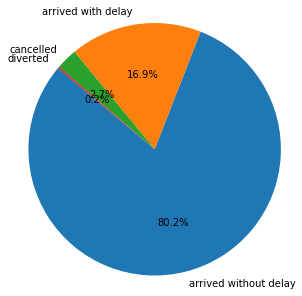

In [53]:
# first of all, let's see the distribution of flights cancelled, diverted, delayed and arrived without any issue
labels ='arrived without delay', 'arrived with delay', 'cancelled', 'diverted'
total_count = [(df_flight_cp.arr_flights.sum() - df_flight_cp.arr_del15.sum()), 
               df_flight_cp.arr_del15.sum(), df_flight_cp.arr_cancelled.sum(), 
               df_flight_cp.arr_diverted.sum()]

plt.figure(figsize = [5, 5])
plt.pie(total_count, labels=labels, startangle=140, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

First, I wanted to answer the question of "what is the ratio of delayed flights compared to all flights planned?" in order to observe anomalities if there is any. 
However, there is anomality observed in this diagram, so now I prefer to check delay reasons in more detail.

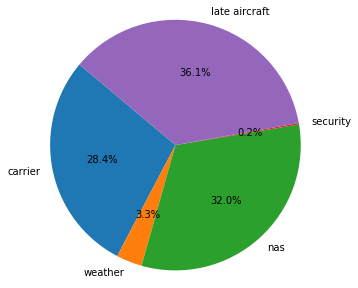

In [52]:
# delayed flight ratio is almost 17% compared to all planned flights.
# now let's check relative frequencies of different reasons of delay
labels ='carrier', 'weather', 'nas', 'security', 'late aircraft'
total_count = [df_flight_cp.carrier_ct.sum(), df_flight_cp.weather_ct.sum(), 
               df_flight_cp.nas_ct.sum(), df_flight_cp.security_ct.sum(),
               df_flight_cp.late_aircraft_ct.sum()]

plt.figure(figsize = [5, 5])
plt.pie(total_count, labels=labels, startangle=140, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

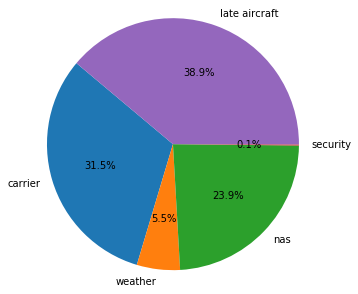

In [54]:
# "late_aircraft" is the biggest reason of delays with the ratio of 36.1%
# now let's see duration of delays by compared to reasons, 
# in order to see if there is corrolation between delay count vs duration in terms of reason
labels ='carrier', 'weather', 'nas', 'security', 'late aircraft'
total_time = [df_flight_cp.carrier_delay.sum(), df_flight_cp.weather_delay.sum(), 
               df_flight_cp.nas_delay.sum(), df_flight_cp.security_delay.sum(),
               df_flight_cp.late_aircraft_delay.sum()]

plt.figure(figsize = [5, 5])
plt.pie(total_time, labels=labels, startangle=140, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

First, I wanted to see the general distribution of delay reason for all delayed flights happened between 2019/01 to 2020/03. "late aircraft" is the most frequent reason from both count or duration perspectives. However, by observing these 2 graphs, it is fair to say that NAS & weather caused delays tend to be shorter than late aircraft and carrier caused delays.

After this general figures, I will now analyse `delayed flight rate` and `delay duration per arrived flight` metrics per carrier, per top 20 airports and per month. 

In [25]:
# in the next step, I would like to see the average delayed flight ratio and duration per airport
# however, there is too many airports for plotting, so I will gest the top 20 busiest airports first.
top20_airports = df_flight_cp['airport'].value_counts()[:20].index.to_list()

# then group by airport data by summing up necessary fields
df_airport_sum = df_flight_cp[df_flight_cp.airport.isin(top20_airports)].groupby(['airport'])['arr_flights', 'arr_del15', 'arr_delay'].sum()
df_airport_sum.sort_values(by=['airport'], ascending=True, inplace=True)

<BarContainer object of 20 artists>

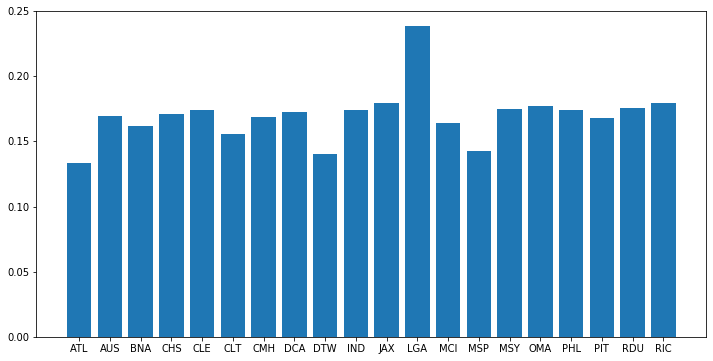

In [56]:
# plot a bar chart to see delayed vs arrived flight rate per airport
plt.figure(figsize = [12, 6])
plt.bar(df_airport_sum.index, (df_airport_sum.arr_del15 / df_airport_sum.arr_flights))

<BarContainer object of 20 artists>

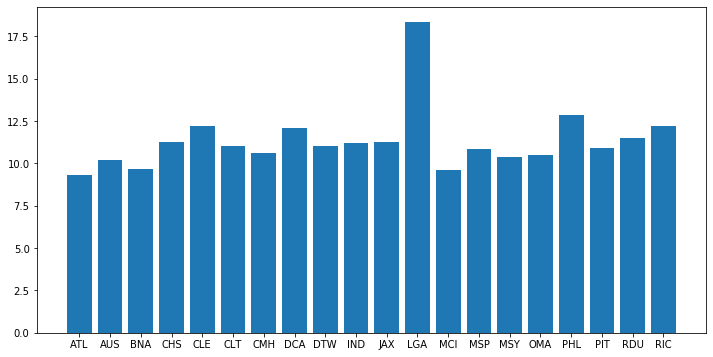

In [57]:
# plot a bar chart to see delay duration per arrived flight per airport
plt.figure(figsize = [12, 6])
plt.bar(df_airport_sum.index, (df_airport_sum.arr_delay / df_airport_sum.arr_flights))

`delayed flight rate` and `delay duration per arrived flight` plottings `per airport` (for only top 20 busiest airports) have revealed the fact that LGA airport has the highest rates in both categories. There must be a special situation with this airport.

In [28]:
# I would like to see the average delayed flight ratio and duration per carrier this time
# grouping flight data by carrier by summing up necessary fields
df_carrier_sum = df_flight_cp.groupby(['carrier'])['arr_flights', 'arr_del15', 'arr_delay'].sum()
df_carrier_sum.sort_values(by=['carrier'], ascending=True, inplace=True)

<BarContainer object of 17 artists>

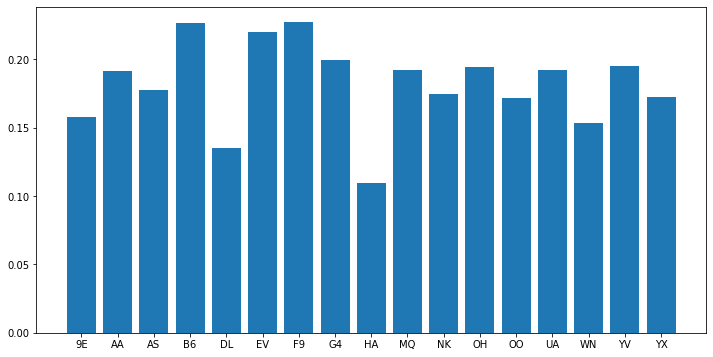

In [58]:
# plot a bar chart to see delayed vs arrived flight rate per carrier
plt.figure(figsize = [12, 6])
plt.bar(df_carrier_sum.index, (df_carrier_sum.arr_del15 / df_carrier_sum.arr_flights))

<BarContainer object of 17 artists>

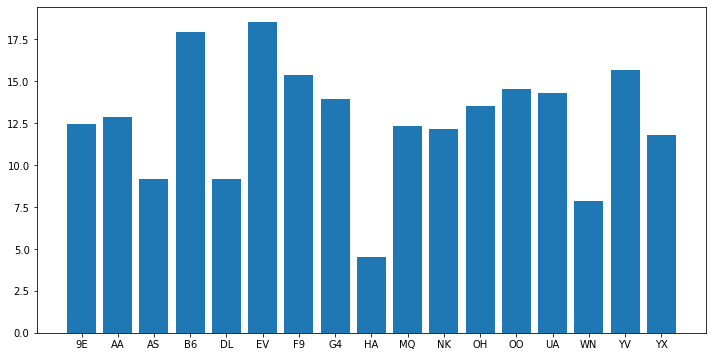

In [59]:
# plot a bar chart to see delay duration per arrived flight per airport
plt.figure(figsize = [12, 6])
plt.bar(df_carrier_sum.index, (df_carrier_sum.arr_delay / df_carrier_sum.arr_flights))

`delayed flight rate` and `delay duration per arrived flight` plottings `per carrier` have revealed the fact that F9 carrier has the highest delayed vs arrived flight rate, however delay duration per flight is 15 min (lower than EV and B6 carriers). Even though F9 carrier has delays more than 20% of flights, they seem to keep these delays shorter.

In [31]:
# now let's look at the same figures for months
# grouping flight data by month by summing up necessary fields
df_month_sum = df_flight_cp.groupby(['year_month'])['arr_flights', 'arr_del15', 'arr_delay'].sum() #.reset_index()
df_month_sum.sort_values(by=['year_month'], ascending=True, inplace=True)

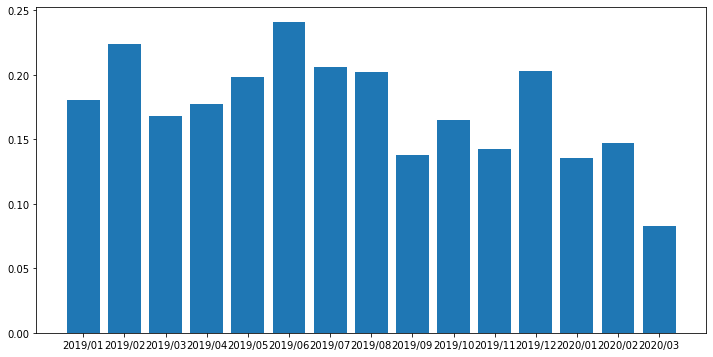

In [60]:
# plot a bar chart to see delayed vs arrived flight rate per month
plt.figure(figsize = [12, 6])
plt.bar(df_month_sum.index, (df_month_sum.arr_del15 / df_month_sum.arr_flights));

<BarContainer object of 15 artists>

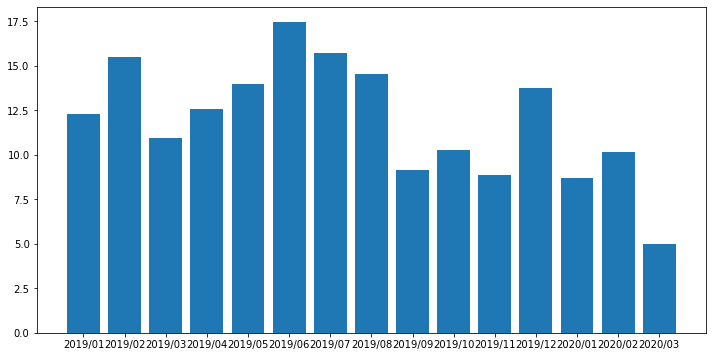

In [62]:
# plot a bar chart to see delay duration per arrived flight per month
plt.figure(figsize = [12, 6])
plt.bar(df_month_sum.index, (df_month_sum.arr_delay / df_month_sum.arr_flights))

Finally, I have plotted `delayed flight rate` and `delay duration per arrived flight` `per month between Jan '19 to Mar '20` and observed an anomaly. March '20 rates in both categories are significantly lower then March '19 or the previous months. Has Covid 19 had anything to do with this? I will try to find an answer to this question.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did not need transformation yet, distribution of values seems usual so far.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I decided to group data by "airport", "carrier" and "year_month" in order to see delayed flight ratio and delay duration per flight for every carrier, for every month from Jan '19 to March '20 and for busiest 20 airports.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

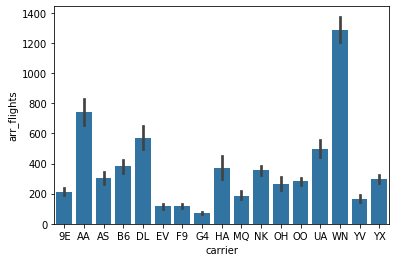

In [34]:
# now let's have a bar graph of arrived flights per carrier
sb.barplot(data = df_flight_cp.sort_values(by=['carrier'], ascending=True), 
           x = 'carrier', y="arr_flights", color = base_color)

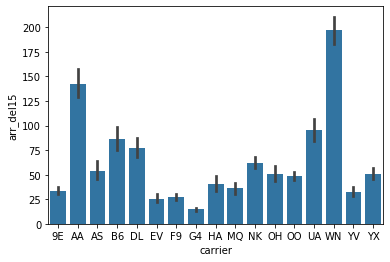

In [35]:
# WN serves by far the highest number of flights.
# now let's see how delayed flight graph per carrier looks like.
sb.barplot(data = df_flight_cp.sort_values(by=['carrier'], ascending=True), 
           x = 'carrier', y="arr_del15", color = base_color)

Before, I go far with `March '20 delay analysis` I would like make a second look into the carrier arrived and delayed flight counts distribution by Carrier, they seem to have almost parallel behaviour in both categories.

Therefore, I will continue with monthly analysis...

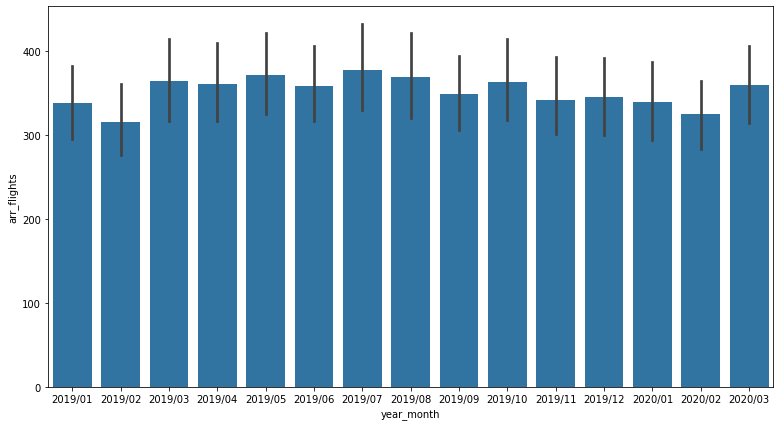

In [50]:
# now let's see the arrived flight bar graph per month
plt.figure(figsize = [13, 7])
ax = sb.barplot(data = df_flight_cp.sort_values(by=['year_month'], ascending=True), 
                x = 'year_month', y="arr_flights", color = base_color)

Arrived flight number has not been changed during March '20 compared to previous months or March '19. So the reason of dropped delays at March '20 cannot be related to number of flights.

At this point I would like to have a deep look into March '20's delay reason distribution

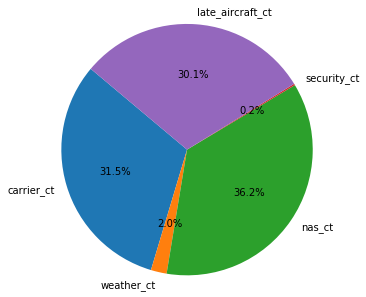

In [51]:
# monthly flight count graph looks stable, except slight decrease on Februaries.
# then why delayed flight ratio decreased significantly at March 2020?
# let's look into March 2020 delay reason distribution closely
labels ='carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct'

df = df_flight_cp[df_flight_cp.year_month == '2020/03']

total_count = [df.carrier_ct.sum(), df.weather_ct.sum(), 
               df.nas_ct.sum(), df.security_ct.sum(),
               df.late_aircraft_ct.sum()]

plt.figure(figsize = [5, 5])
plt.pie(total_count, labels=labels, startangle=140, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

When compared the general plot, `late aircraft` caused delays dropped 6% in March '20. There must be something improving some conditions causing aircrafts to be late.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I have observed a significant decrease on delayed flights rate at March 2020. Even though total arrived flight count stays almost same compared to March 2019, delayed flight count has been halfed almost.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Flight counts stays balanced during the year, except the small drops occuring on Februaries.

> LGA airport does not only have the highest rate of delayed flights but also the highest delay duration per flight. There must be a special case with this airport.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

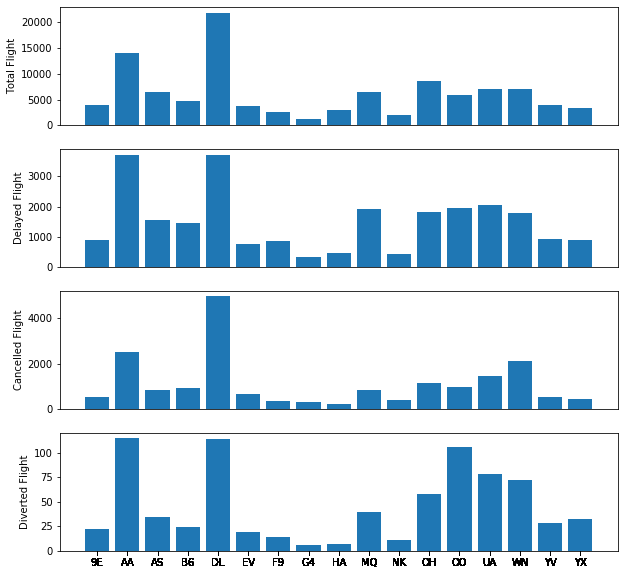

In [38]:
# let's observe the arrived vs delayed vs cancelled vs diverted flights bar graphs per carrier in grid view.
plt.figure(figsize = [10, 10])
tmp_df = df_flight_cp.sort_values(by=['carrier'], ascending=True)

plt.subplot(4, 1, 1) 
plt.bar(tmp_df['carrier'], tmp_df['arr_flights'])
plt.ylabel('Arrived Flight')
plt.xticks([],[])

plt.subplot(4, 1, 2) 
plt.bar(tmp_df['carrier'], tmp_df['arr_del15'])
plt.ylabel('Delayed Flight')
plt.xticks([],[])

plt.subplot(4, 1, 3) 
plt.bar(tmp_df['carrier'], tmp_df['arr_cancelled'])
plt.ylabel('Cancelled Flight')
plt.xticks([],[])
                                                            
plt.subplot(4, 1, 4)
plt.bar(tmp_df['carrier'], tmp_df['arr_diverted'])
plt.ylabel('Diverted Flight')
plt.xticks(tmp_df['carrier'], tmp_df['carrier'])

plt.show()

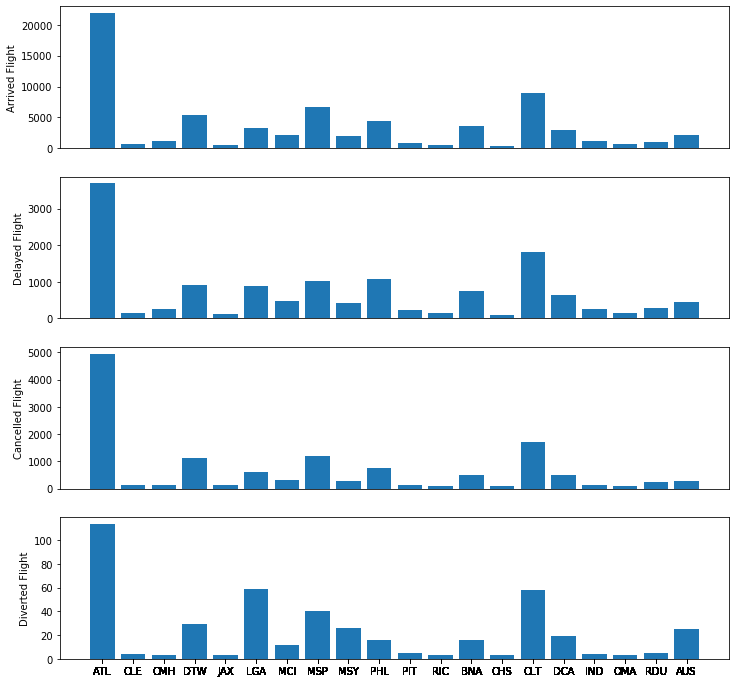

In [46]:
# let's plot the same for 20 busiest airports too.
plt.figure(figsize = [12, 12])
top20_airports = df_flight_cp['airport'].value_counts()[:20].index.to_list()
tmp_df = df_flight_cp[df_flight_cp.airport.isin(top20_airports)]

plt.subplot(4, 1, 1) 
plt.bar(tmp_df['airport'], tmp_df['arr_flights'])
plt.ylabel('Arrived Flight')
plt.xticks([],[])

plt.subplot(4, 1, 2) 
plt.bar(tmp_df['airport'], tmp_df['arr_del15'])
plt.ylabel('Delayed Flight')
plt.xticks([],[])

plt.subplot(4, 1, 3) 
plt.bar(tmp_df['airport'], tmp_df['arr_cancelled'])
plt.ylabel('Cancelled Flight')
plt.xticks([],[])
                                                            
plt.subplot(4, 1, 4)
plt.bar(tmp_df['airport'], tmp_df['arr_diverted'])
plt.ylabel('Diverted Flight')
plt.xticks(tmp_df['airport'], tmp_df['airport'])

plt.show()

Before moving forward with `March '20 delay analysis` again, last time I would like look observe the distribution of `arrived vs delayed vs cancelled vs diverted flight counts` by carrier and top 20 airports on seperate grid plots in order to reflect the broad picture. As an outcome, not much revealed by these grid plots, one minor observation is AA and OO carriers have very high diverted flight rate, there must be a special reason perhaps related to their common destinations.

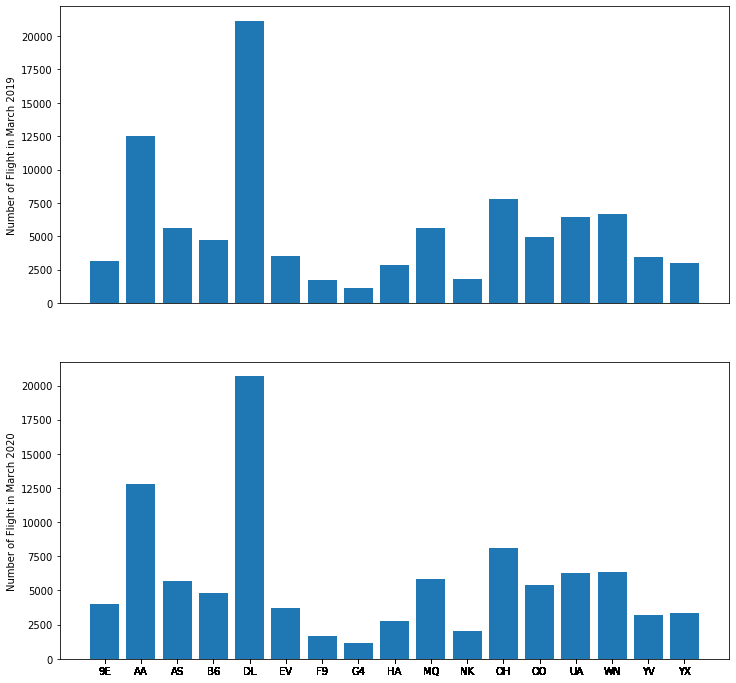

In [45]:
# there was a significant decrease on delayed flight count at March 2020
# I would like to taka a closer look into March 2019 and 2020, by comparing flight count per carrier.
plt.figure(figsize = [12, 12])

plt.subplot(2, 1, 1) 
tmp_df = df_flight_cp[df_flight_cp.year_month == "2019/03"].sort_values(by=['carrier'], ascending=True)
plt.bar(tmp_df['carrier'], tmp_df['arr_flights'])
plt.ylabel('Number of Flight in March 2019')
plt.xticks([],[])

plt.subplot(2, 1, 2) 
tmp_df = df_flight_cp[df_flight_cp.year_month == "2020/03"].sort_values(by=['carrier'], ascending=True)
plt.bar(tmp_df['carrier'], tmp_df['arr_flights'])
plt.ylabel('Number of Flight in March 2020')
plt.xticks(tmp_df['carrier'], tmp_df['carrier'])

plt.show()

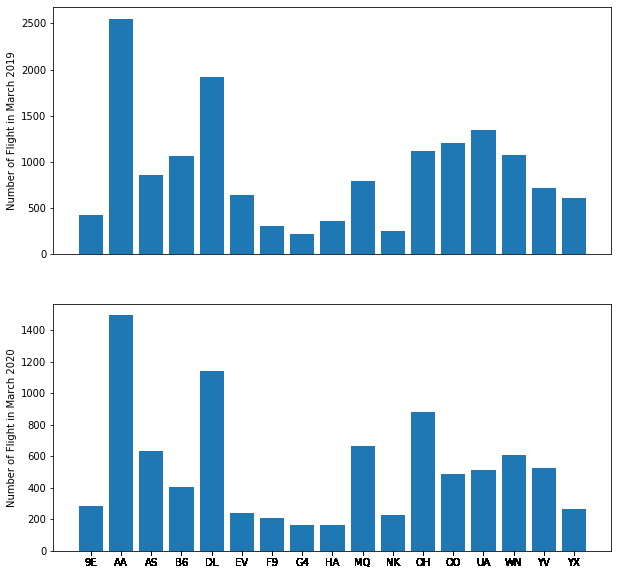

In [41]:
# there was a significant decrease on delayed flight count at March 2020, 
# however flight count distribution per carrier looks almost same compared to March 2019.

# now I would like to make same comparison for delayed flight count
plt.figure(figsize = [10, 10])

plt.subplot(2, 1, 1) 
tmp_df = df_flight_cp[df_flight_cp.year_month == "2019/03"].sort_values(by=['carrier'], ascending=True)
plt.bar(tmp_df['carrier'], tmp_df['arr_del15'])
plt.ylabel('Number of Flight in March 2019')
plt.xticks([],[])

plt.subplot(2, 1, 2) 
tmp_df = df_flight_cp[df_flight_cp.year_month == "2020/03"].sort_values(by=['carrier'], ascending=True)
plt.bar(tmp_df['carrier'], tmp_df['arr_del15'])
plt.ylabel('Number of Flight in March 2020')
plt.xticks(tmp_df['carrier'], tmp_df['carrier'])

plt.show()

Then I plotted 2 grid plots in order to compare arrived and delayed flight rates to compare `March '19 vs March '20`. However, again no significant change in flight counts.

Next step is splitting monthly delayed flights into delay reasons on a single large diagram for a better comparison on reasons.

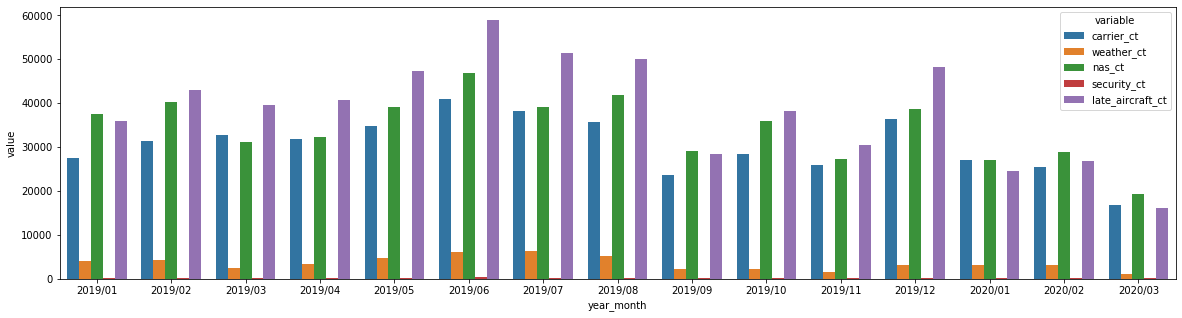

In [42]:
# so maybe the reason of decrease hides behind the delay reasons?
tmp_df = df_flight_cp.groupby(['year_month'], as_index=False).agg({'carrier_ct': "sum", 'weather_ct': "sum",
                                                                   'nas_ct': "sum", 'security_ct': "sum",
                                                                   'late_aircraft_ct': "sum"})

tmp_df = pd.melt(tmp_df, id_vars=['year_month'], value_vars=['carrier_ct', 'weather_ct', 'nas_ct', 
                                                             'security_ct', 'late_aircraft_ct'])

plt.figure(figsize=(20,5))
ax = sb.barplot(data = tmp_df, x = 'year_month', y = 'value', hue = 'variable')

At 2019, `late aircraft` was the most frequent reason, on the other hand at 2020 it is either second or third most frequent reason. In addition, there is an obvious decrease trend on delayed flight counts in 2020. The reason could be the flight bans started January and reached to extreme levels at March 2020.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed a big surprise at the monthly distributed delayed vs arrived flights ratio graph; delayed flight ratio and duration per flight tend to decrease since August 2019 however it drops dramatically at March 2020. When I look at the arrived flight per month bar plot, I could easily see there is no decrease on flight counts at March 2020. On the other hand, we see 6% decrease in the count of late aircraft caused delayed flights at March 2020.

### Were there any interesting or surprising interactions between features?

> Even though NAS reason has a high ratio on delayed flight count spread, its impact lowers for duration whereas carrier, weather and late aircraft reasons have an opposite impact. Therefore carrier, weather and late aircraft reasoned delays should tend to take longer than security or NAS related delays.

> LGA airport does not only have the highest rate of delayed flights but also the highest delay duration per flight. There must be a special case with this airport.

> F9 carrier has the highest delayed vs arrived flight rate, however delay duration per flight is 15 min (lower than EV and B6 carriers). Even though F9 carrier has delays more than 20% of flights, they seem to keep delays shorter.

> **WN** airline has the highest flight rate; **AA, DL and UA** follow it. Parallel to flight numbers, **WN** airline has the highest delayed flight rate and **AA** follows it; but the order for the rest is different: **UA, B6**. 

> highest number of flights were in July 2019, but in general distribution looks balanced in general except the decrease on Februaries.